In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 11.4MB/s 
     |████████████████████████████████| 194kB 24.3MB/s 
     |████████████████████████████████| 1.2MB 37.5MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 12.8MB 239kB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
!pip install -q jmd_imagescraper


In [ ]:
from jmd_imagescraper.core import *

In [ ]:
root = Path().cwd()/("images")

duckduckgo_search(root, "Ara Macao","ara macao", max_results=80)
duckduckgo_search(root, "Ara Ararauna","ara ararauna", max_results=80)


Duckduckgo search: ara macao


Duckduckgo search: ara ararauna


[Path('/content/images/Ara Ararauna/001_805aace6.jpg'),
 Path('/content/images/Ara Ararauna/002_ad4dbebf.jpg'),
 Path('/content/images/Ara Ararauna/003_41f73c0e.jpg'),
 Path('/content/images/Ara Ararauna/004_e89d91e3.jpg'),
 Path('/content/images/Ara Ararauna/005_df8ddb0b.jpg'),
 Path('/content/images/Ara Ararauna/006_6cc5ff3b.jpg'),
 Path('/content/images/Ara Ararauna/007_9fe25e3d.jpg'),
 Path('/content/images/Ara Ararauna/008_d50923ae.jpg'),
 Path('/content/images/Ara Ararauna/009_1b6c2857.jpg'),
 Path('/content/images/Ara Ararauna/010_c94fabfb.jpg'),
 Path('/content/images/Ara Ararauna/011_cbc66b4e.jpg'),
 Path('/content/images/Ara Ararauna/012_a8a55f6e.jpg'),
 Path('/content/images/Ara Ararauna/013_16c07378.jpg'),
 Path('/content/images/Ara Ararauna/014_3630308d.jpg'),
 Path('/content/images/Ara Ararauna/015_0f90615f.jpg'),
 Path('/content/images/Ara Ararauna/016_d79878ed.jpg'),
 Path('/content/images/Ara Ararauna/017_28fdc1ee.jpg'),
 Path('/content/images/Ara Ararauna/018_a44a7740

In [ ]:
from jmd_imagescraper.imagecleaner import *

display_image_cleaner(root)

HTML(value='<h2>No images left to display in this folder.</h2>', layout=Layout(visibility='hidden'))

GridBox(children=(VBox(children=(Image(value=b'', layout="Layout(width='150px')"), Button(description='Delete'…

In [ ]:
path = Path("images")
fns = get_image_files(path)

In [ ]:
fns

(#151) [Path('images/Ara Macao/013_31a03f7b.jpg'),Path('images/Ara Macao/019_e236279b.jpg'),Path('images/Ara Macao/026_a27ef0a4.jpg'),Path('images/Ara Macao/079_80678b42.jpg'),Path('images/Ara Macao/002_7771e538.jpg'),Path('images/Ara Macao/075_acec8f2b.jpg'),Path('images/Ara Macao/033_58f86b16.jpg'),Path('images/Ara Macao/009_f7c0e073.jpg'),Path('images/Ara Macao/046_a1690ffa.jpg'),Path('images/Ara Macao/037_7f578c56.jpg')...]

In [ ]:
failed = verify_images(fns)
failed

(#0) []

In [ ]:
Birds = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                         get_items =get_image_files,
                         splitter=RandomSplitter(valid_pct=0.2,seed=42),
                         get_y=parent_label,
                         item_tfms=Resize(128))

In [ ]:
dls = Birds.dataloaders(path)

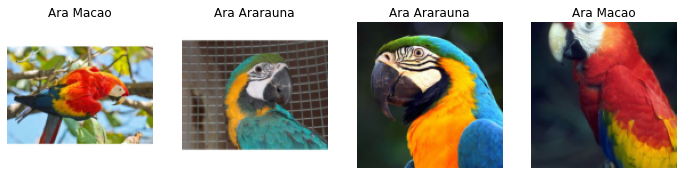

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
birds= Birds.new(item_tfms=RandomResizedCrop(224, min_scale=0.4))
dls=birds.dataloaders(path)


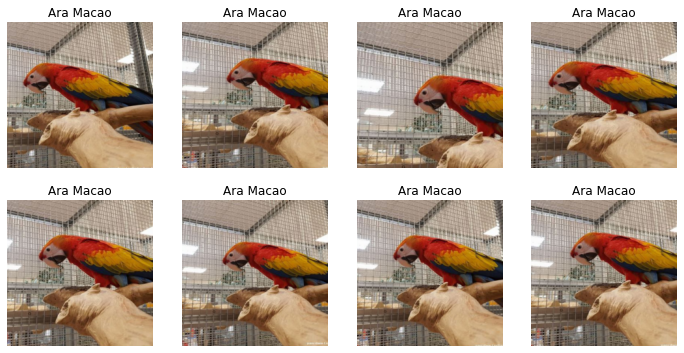

In [ ]:
dls.train.show_batch(max_n=8, nrows=2, unique=True)

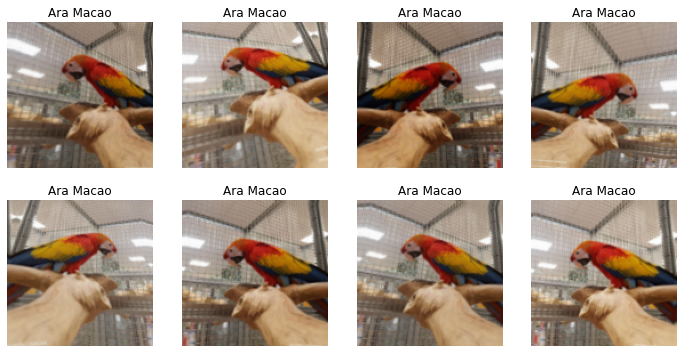

In [ ]:
birds = birds.new(item_tfms=Resize(128), batch_tfms=aug_transforms())
dls = birds.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
learner = cnn_learner(dls,resnet18,metrics=error_rate )
learner.fine_tune(6)

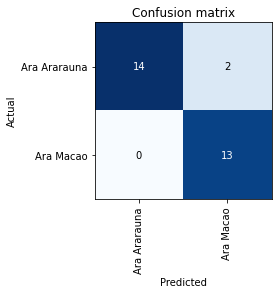

In [ ]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()

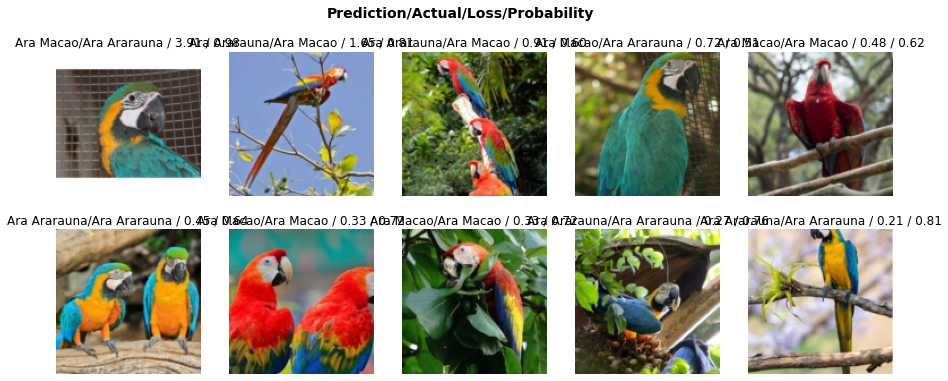

In [ ]:
interp.plot_top_losses(10, nrows=2)

In [ ]:
cleaner = ImageClassifierCleaner(learner)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [ ]:
learner.export()

In [ ]:
path = Path()
path.ls(file_exts=".pkl")

(#1) [Path('export.pkl')]